### Problem Statement:

Given the artists and tracks files of the Spotify dataset, the aim is to predict a track's popularity based on the other features related to it, including the individual popularities of the artists as taken from the artists file; and comparing and choosing the most accurate machine learning model.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
%matplotlib inline

### Loading dataset

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Vanshika_Goyal_2024UCA1845/Dataset/tracks.csv', low_memory=False)

In [3]:
df_a=pd.read_csv('/content/drive/MyDrive/Vanshika_Goyal_2024UCA1845/Dataset/artists.csv', low_memory=False)

### Exploring the data

In [4]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [6]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [7]:
df.shape

(586672, 20)

### Checking for and handling missing values

In [8]:
df.isnull().sum()

,0
id,0
name,71
popularity,0
duration_ms,0
explicit,0
artists,0
id_artists,0
release_date,0
danceability,0
energy,0


Null values in name column.

Replacing null values in name column with 'Unknown'.

Replacing null values in followers column with mean of values in the column.

In [9]:
df.fillna('Unknown', inplace=True)

In [10]:
df.isnull().sum()

,0
id,0
name,0
popularity,0
duration_ms,0
explicit,0
artists,0
id_artists,0
release_date,0
danceability,0
energy,0


Null values filled with 'Unknown'.

### EDA

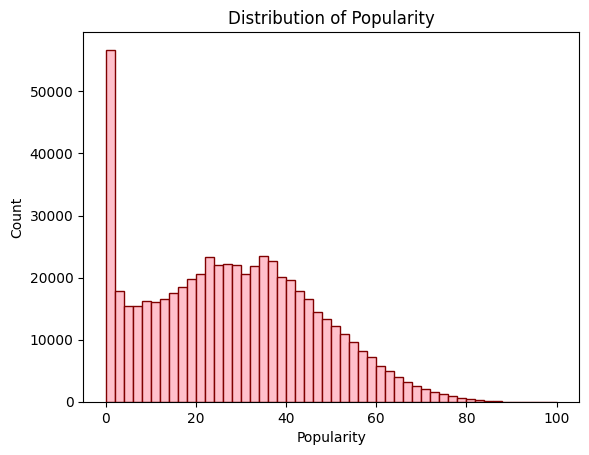

In [11]:
plt.hist(df['popularity'], bins=50, color='pink', edgecolor='maroon')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Distribution of Popularity')
plt.show()

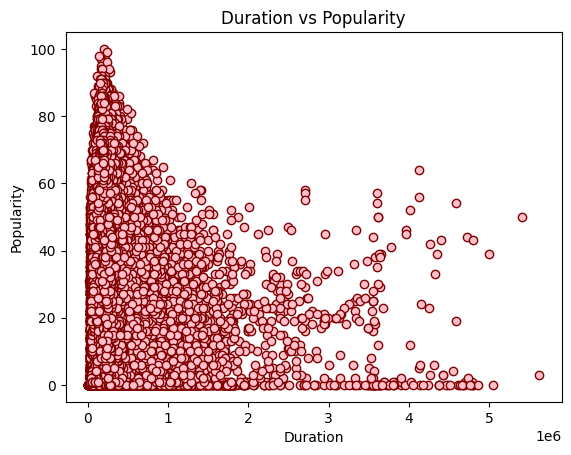

In [12]:
plt.scatter(df['duration_ms'], df['popularity'], color='pink', edgecolor='maroon')
plt.title('Duration vs Popularity')
plt.xlabel('Duration')
plt.ylabel('Popularity')
plt.show()

### Adding new column

Adding new column 'artist_popularity' in the tracks file, containing the average of popularity of the artists taken individually according to artists file.

In [13]:
artist_popularity=df_a.set_index('name')['popularity'].to_dict()

def calculate_popularity(artist_names):
    artist_list=artist_names.split(', ')
    return sum(artist_popularity.get(artist.strip(), 0) for artist in artist_list)/len(artist_list)
df['artist_popularity'] = df['artists'].apply(calculate_popularity)

df.to_csv("tracks_new.csv", index=False)

To check if 'artist_popularity' has non-zero values (hence checking if the code is working fine)

In [14]:
has_nonzero=(df['artist_popularity'] != 0).any()
has_nonzero

True

### Feature engineering
Encoding using Label Encoder

In [15]:
encoder=LabelEncoder()

In [16]:
L=['id','name','artists','id_artists','release_date']
for i in L:
  df[i+'_encoded']=encoder.fit_transform(df[i])
  df.drop(columns=[i], axis=1, inplace=True)

In [17]:
df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,time_signature,artist_popularity,id_encoded,name_encoded,artists_encoded,id_artists_encoded,release_date_encoded
0,6,126903,0,0.645,0.4450,0,-13.338,1,0.4510,0.674,...,0.1510,0.1270,104.851,3,0.0,240532,62328,103291,61282,3
1,0,98200,0,0.695,0.2630,0,-22.136,1,0.9570,0.797,...,0.1480,0.6550,102.009,1,0.0,2702,60987,32587,16189,7
2,0,181640,0,0.434,0.1770,1,-21.180,1,0.0512,0.994,...,0.2120,0.4570,130.418,5,0.0,9304,377629,44117,79643,4
3,0,176907,0,0.321,0.0946,7,-27.961,1,0.0504,0.995,...,0.1040,0.3970,169.980,3,0.0,10708,106033,44117,79643,4
4,0,163080,0,0.402,0.1580,3,-16.900,0,0.0390,0.989,...,0.3110,0.1960,103.220,4,0.0,11684,198883,25190,48500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,50,258267,0,0.560,0.5180,0,-7.471,0,0.0292,0.785,...,0.0648,0.2110,131.896,4,0.0,446276,429411,113813,21936,19497
586668,72,153293,0,0.765,0.6630,0,-5.223,1,0.0652,0.141,...,0.0924,0.6860,150.091,4,0.0,30852,399847,81827,25584,19522
586669,70,187601,0,0.535,0.3140,7,-12.823,0,0.0408,0.895,...,0.0874,0.0663,145.095,4,0.0,166260,384869,31569,47474,19473
586670,58,142003,0,0.696,0.6150,10,-6.212,1,0.0345,0.206,...,0.3050,0.4380,90.029,4,0.0,314741,13688,36289,71060,19657


### Train-test split

80% train, 20% test

In [18]:
X=df.drop(columns=['popularity'], axis=1)
y=df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalization

In [19]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Comparing Different Machine Learning Models

Adding different ml model names as keys and their functions to be run as values in a dictionary models to facilitate running loop for comparison.

In [20]:
models={"Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100)}

Getting the accuracy of the models.

Using dictionary to store the results with the model names as keys and values as nested dictionaries with keys as the repective metrics for comparison and values as the values of the metrics.

In [21]:
results={}
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred=model.predict(X_test_scaled)

  mse=mean_squared_error(y_test, y_pred)
  rmse=np.sqrt(mse)
  r2=r2_score(y_test, y_pred)

  results[name]={'MSE':mse, 'RMSE':rmse, 'R2':r2}

Creating a dataframe from results dictionary.

In [22]:
results_df=pd.DataFrame(results).T
results_df

,MSE,RMSE,R2
Linear Regression,215.252403,14.671483,0.356723
KNN,209.877250,14.487141,0.372786
Decision Tree,286.384242,16.922891,0.144147
Random Forest,136.751019,11.694059,0.591322
XGBoost,145.120605,12.046601,0.566310


Checking and printing best model

In [23]:
best_model_name=results_df["R2"].idxmax()
best_model=models[best_model_name]
best_model_name

'Random Forest'

Visualization of r² comparison

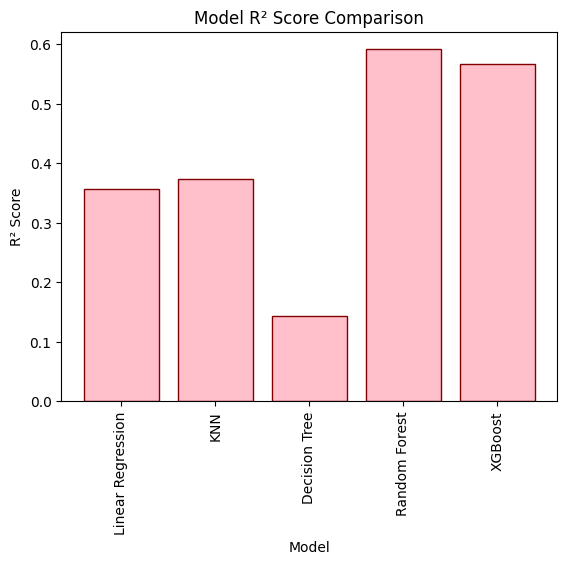

In [24]:
plt.bar(results_df.index, results_df['R2'], color='pink', edgecolor='maroon')
plt.title('Model R² Score Comparison')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.xticks(rotation=90)
plt.show()